# Mini Project - Job Salaries Dataset

In [71]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter
import collections

In [72]:
dsdata = pd.read_csv('ds_salaries.csv')
dsdata.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [73]:
dsdata.describe()

,Index,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [74]:
dsdata.isna().sum()

Index                 0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [84]:
salary = pd.DataFrame(dsdata['salary_in_usd'])

In [85]:
salary["salary_in_usd"].max()

600000

<AxesSubplot:>

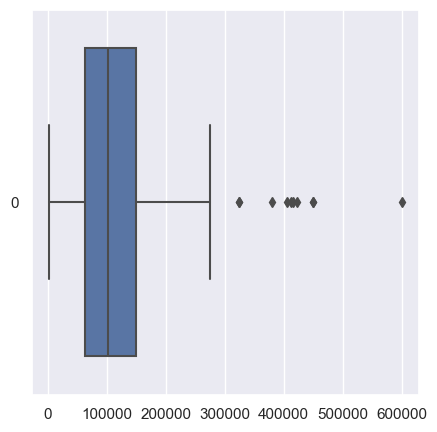

In [86]:
fig = plt.figure(figsize=(5,5))
sb.boxplot(data=salary["salary_in_usd"], orient='h')

In [87]:
salary.describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


In [88]:
salary

,salary_in_usd
0,79833
1,260000
2,109024
3,20000
4,150000
...,...
602,154000
603,126000
604,129000
605,150000


In [98]:
salary_filtered = salary[(np.abs(stats.zscore(salary)) < 3).all(axis=1)]
salary_filtered.describe()

,salary_in_usd
count,598.000000
mean,107531.449833
std,59174.545525
min,2859.000000
25%,62649.500000
50%,100000.000000
75%,149565.250000
max,324000.000000


In [93]:
labels = ["low", "low-mid", "mid", "mid-high", "high"]
labels

['low', 'low-mid', 'mid', 'mid-high', 'high']

In [99]:
salary_filtered["salary_group"] = pd.cut(salary_filtered.salary_in_usd, range(2500, 356150, 64300), right=False, labels=labels)
salary_filtered

C:\Users\s0801\AppData\Local\Temp\ipykernel_14560\1388088196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_filtered["salary_group"] = pd.cut(salary_filtered.salary_in_usd, range(2500, 356150, 64300), right=False, labels=labels)


,salary_in_usd,salary_group
0,79833,low-mid
1,260000,high
2,109024,low-mid
3,20000,low
4,150000,mid
...,...,...
602,154000,mid
603,126000,low-mid
604,129000,low-mid
605,150000,mid


In [105]:
salary_outliers = salary[(np.abs(stats.zscore(salary)) >= 3).all(axis=1)]
salary_outliers["salary_group"] = "outlier"
salary_outliers

C:\Users\s0801\AppData\Local\Temp\ipykernel_14560\2423084383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_outliers["salary_group"] = "outlier"


,salary_in_usd,salary_group
25,325000,outlier
33,450000,outlier
63,412000,outlier
97,450000,outlier
157,423000,outlier
225,416000,outlier
252,600000,outlier
519,380000,outlier
523,405000,outlier


In [107]:
salary = pd.concat([salary_filtered,salary_outliers])
salary = salary.sort_index(ascending=True)
salary

,salary_in_usd,salary_group
0,79833,low-mid
1,260000,high
2,109024,low-mid
3,20000,low
4,150000,mid
...,...,...
602,154000,mid
603,126000,low-mid
604,129000,low-mid
605,150000,mid
